# 用 Python 語言描述各種常見隨機分布
**常見的隨機變數分佈如下**

我們先載入必要程式庫並做出始動作：並做初始動作：

In [1]:
# for inline plots in jupyter
%matplotlib inline

# import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [8, 4]
plt.style.use(['seaborn-darkgrid'])

In [2]:
# import seaborn
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(8,4)})

## 1. 均勻分佈 Uniform Distribution

最簡單也很有用的連續型分佈 PDF 如下:


$$
\begin{equation}
  f(x) =
    \begin{cases}
      \frac{1}{b-a} & \text{for} \ a \leq x \leq b, \\
      0  & \text{for} \ x < a \ \text{or} \ x > b
    \end{cases}       
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. The following figure shows a uniform distribution in interval (a,b). Notice since the area needs to be $1$. The height is set to $1/(b-a)$.


![](graphics/figure1.png)

從 `scipy.stats` 下載 uniform module.


In [3]:
# import uniform distribution
from scipy.stats import uniform

`uniform` 經由`loc` 和 `scale` 參數產生一連續型均勻分佈變數. 平均分佈在`loc` 和 `loc + scale`之間. `size` 代表隨機變數的數目. `random_state` 確定產出一致.


In [4]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

可以用 Seaborn’s `distplot` 繪出直方圖.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

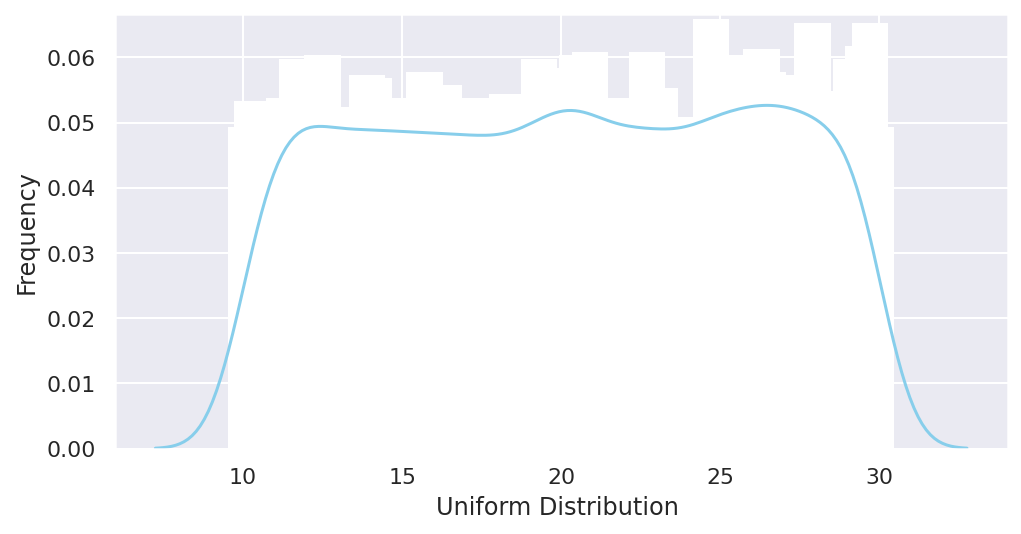

In [5]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## 2. 常態分佈 Normal Distribution

常態分佈也較高斯分佈 Gaussian distribution, 在資料科學無所不在. 統計學上用的最廣統計學上用的最廣. 此分佈是許多數據演算法的假設此分佈是許多數據演算法的假設.

這是一個鐘形的木度分佈，平均值為 $μ$ 標準差 $σ$. 密度曲線乘對稱, 以平均值為中心. PDF( probability distribution function) 如下:


$$
f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


![](graphics/figure2.png)


In [6]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

以seaborn distplot 繪出

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

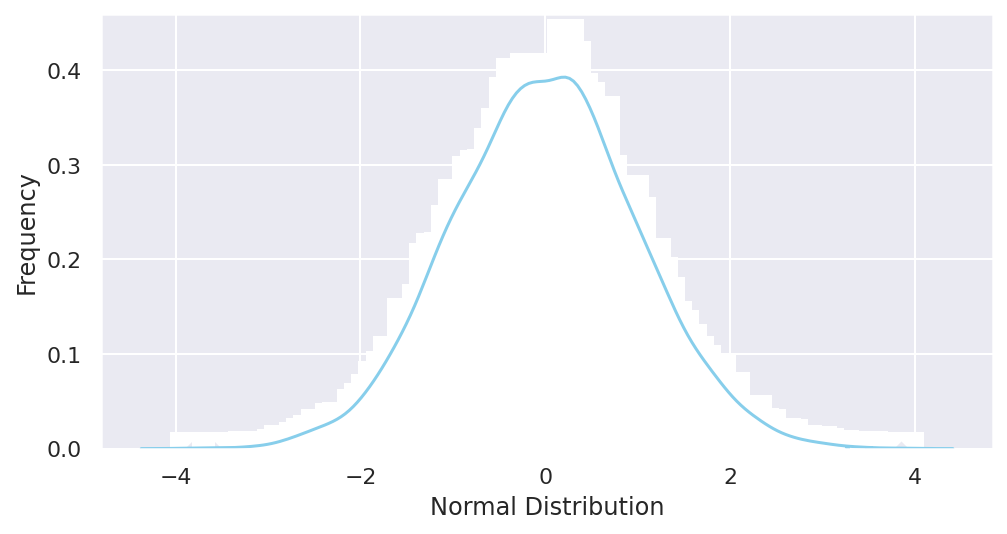

In [7]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## 4. 指數分佈 Exponential Distribution

指數分佈描述一個穩定獨立固定平均發生機率事件(Poisson point Process Event)間格的時間。 $λ$ 叫做比率參數, 等式如下 :


$$
f(x;\lambda)=
    \begin{cases}
        \lambda e^{-\lambda x} & x \geq 0, \\
        0 & x < 0
    \end{cases}
$$

使用 `scipy.stats` 模組的 `expon.rvs()` 方法產生。 形狀參數 `scale` 就是等式中的 `1/lambda`. `loc` 是用來移動分佈的位置, `size` 決定變化大小. 


In [10]:
from scipy.stats import expon

data_expon = expon.rvs(scale=1,loc=0,size=1000)

我們以 seaborn 繪出:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

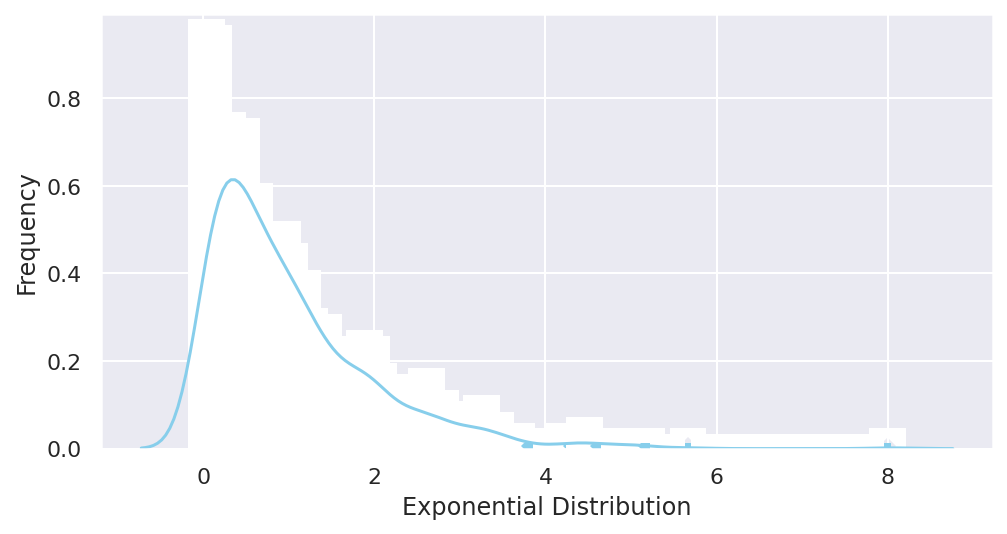

In [11]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## 5. 布阿松分佈 Poisson Distribution

Poisson random variable 用來描述某段時間發生的次數. 比方一日內的網站訪問數. Poisson 分佈以事件發生率 rate ($μ$) 表達. 某段時間之事件發生數可以 0, 1, 2, … 表達表達，發生平均數發生平均數稱為 $λ$ (lambda). 在某段時間發生 $k$ 的機率是:


$$
P(k \ \text{events in interval}) = \frac{\lambda^k}{k!} e^{-\lambda} 
$$

布阿松分佈API


In [12]:
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)

以seaborn繪圖如下


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

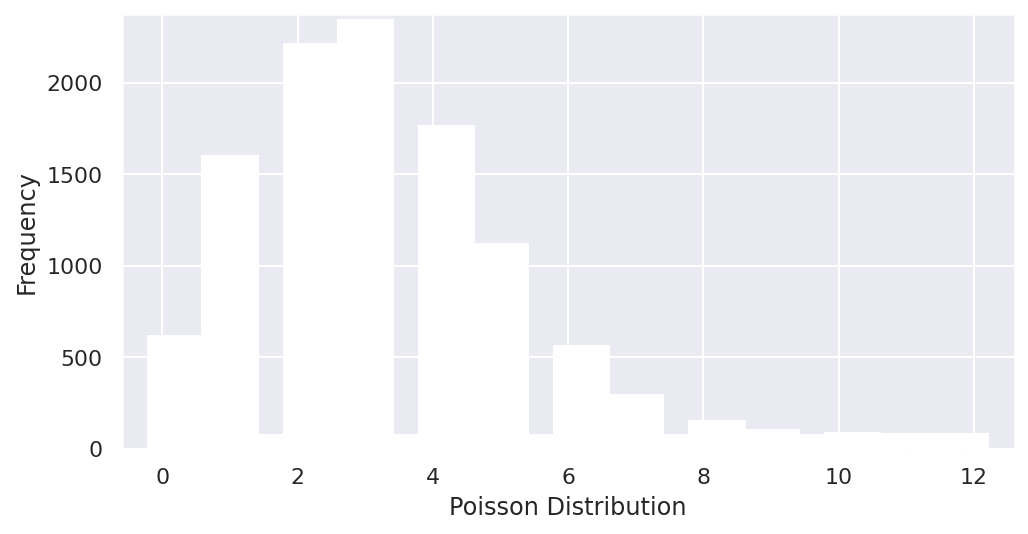

In [13]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## 6. 二項式分布 Binomial Distribution

此分布此分布紙又兩種結果且成功機率固定. 每次結果式獨立，且成敗機率不必相等。參數是 $n$ 和 $p$。 $n$ 是嘗試次數, 而 $p$ 成功機率成功機率. PDF 為 :


$$f(k,n,p) = Pr(k; n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}$$

其中 :


$$
{n \choose k} = \frac{n!}{k!(n-k)!}
$$

二項式分佈的API


In [14]:
from scipy.stats import binom

data_binom = binom.rvs(n=10,p=0.8,size=10000)

繪圖：


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

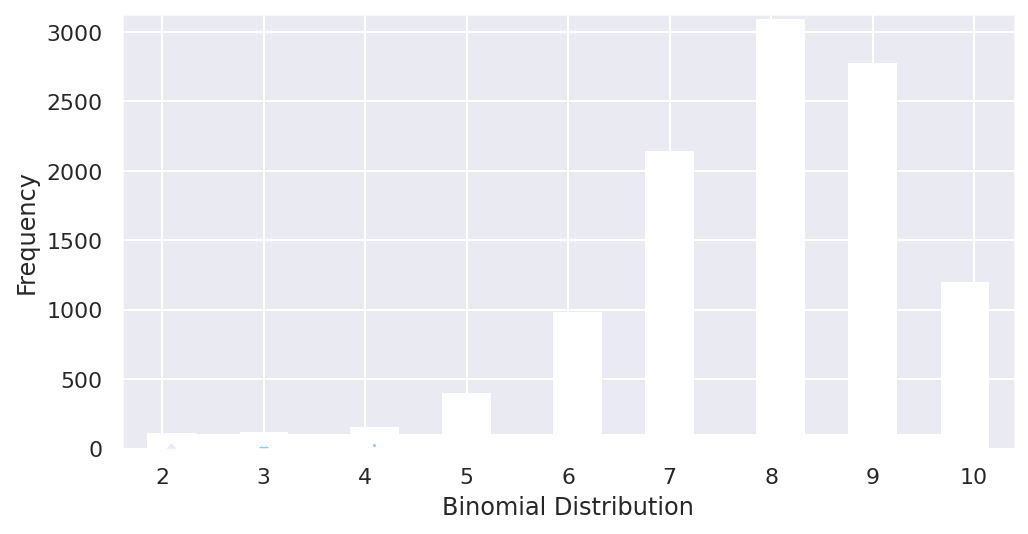

In [15]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')



## 7. 柏努力分布 Bernoulli Distribution

柏努力分布只試一次，如丟銅板，只有兩個結果,  $1$ (success) 和 $0$ (failure) 它就是二項式分布只執行一次的分布。 PMF 如下:


$$
f(k;p) = p^k(1-p)^{1-k} \quad \text{for} \ k \in \{0,1\}
$$

柏努力分布API


In [16]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000,p=0.6)

繪圖


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

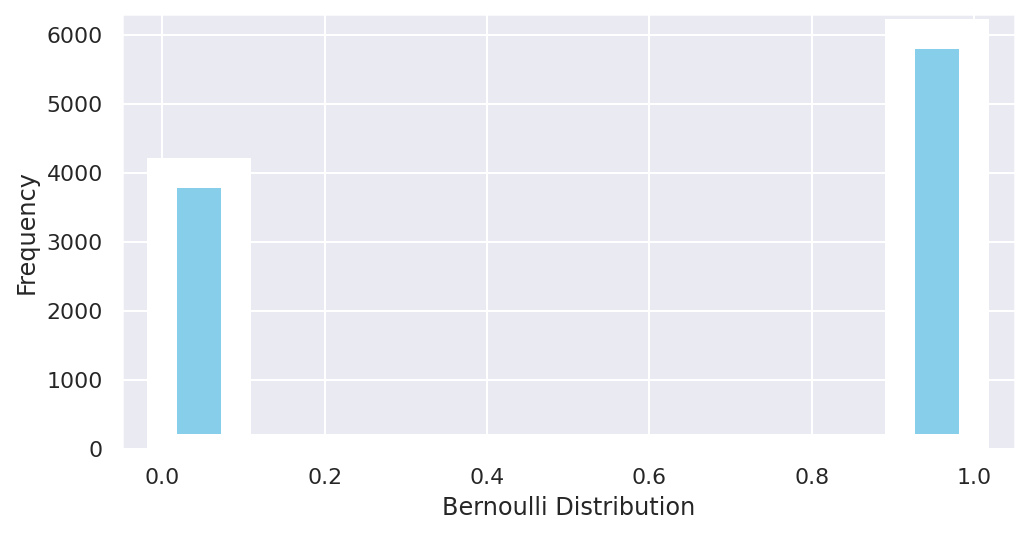

In [17]:
ax = sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')